# Workbench Workshop: Building AI Using SAS and Python

Today, we are analysing the latest campaign for a financial services firm. The purpose of our project is to build and train a few models which can be used to predict if a customer of the bank will purchase an insurance product from the bank for the current campaign. We will work together to find the best model for the firm.

We are targeting the variable <b>Status</b> as it represents whether a customer did [1] or did not [0] purchase a product based on their current campaign.

The bank data set is a sample taken from a large financial services firm accounts. Accounts in the data represent consumers of home equity lines of credit, automobile loans, and other types of short-term to medium-term credit instruments.

# Instructions
Follow along as we use Python on Workbench to prepare, explore,and model our data. For this project, we will be calling in SAS algorithms to help us create the best model we can.

If you have not used a Jupyter notebook before - you can click on the code cells and press the "play" button at the top menu. You can also use "Shift + Enter"

# Step 1: Install and Import Packages
Importing Python packages is essential because it allows us to access pre-built functions and tools that streamline development. Some of these may be your favorites!

## Install Packages

In [1]:
%pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<div class="alert alert-info" role="alert">
After you have installed imbalance-learn, please restart your kernel to assure imbalance-learn is fully incorporated. 

Can do this by finding "Kernel" at the top of the page and clicking "Restart kernel"
</div>

## Import Packages

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score

from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE

from sasviya.ml.tree import ForestClassifier

# Step 2: Importing our Data

In [3]:
# Save the bank's data as a dataframe 
# Using the pandas package 

# Call csv file by name
bank = pd.read_csv("./bank.csv")

# Show how many rows and columns in our data
print("Training data shape", bank.shape)

Training data shape (108600, 21)


In [4]:
# Have a glimpse of 5 rows from our dataset
bank.head()

,AccountID,Status,Customer_Value,Age,Home_Flag,Homeval,Inc,Pr,Activity_Status,AvgSale3Yr,...,AvgSale3Yr_DP,LastProdAmt,CntPur3Yr,CntPurLife,CntPur3Yr_DP,CntPurLife_DP,CntTotPromo,MnthsLastPur,Cnt1Yr_DP,CustTenure
0,5200000001,1,A,NaN,0,57600,52106,24,High,5.71,...,5.25,10.0,7,22,4,6,20,5,9,92
1,5200000002,1,A,NaN,0,57587,52106,24,High,5.71,...,5.25,10.0,7,22,4,6,20,5,9,92
2,5200000003,1,A,NaN,0,44167,42422,0,High,12.80,...,13.00,12.0,5,16,3,8,27,16,11,91
3,5200000004,0,A,68.0,0,90587,59785,32,High,21.60,...,20.00,25.0,5,21,2,7,19,15,9,123
4,5200000005,0,A,NaN,0,100313,0,0,High,7.33,...,7.60,10.0,6,38,5,19,13,24,6,128


<div class="alert alert-info" role="alert">
We now have our dataset ready to roll. Let's learn more about what information this dataset holds and what insight we can reach.
</div>

# Step 3: Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) is crucial in data science projects because it helps us understand the structure and characteristics of the data we're working with. By exploring variables, identifying patterns, detecting anomalies, and visualizing relationships, EDA enables us to make informed decisions about data preprocessing, feature engineering, and model selection. It also plays a key role in uncovering insights and formulating hypotheses, laying the groundwork for more accurate modeling and impactful conclusions.

## Variables 

In [5]:
# understanding column names and format

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108600 entries, 0 to 108599
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AccountID        108600 non-null  int64  
 1   Status           108600 non-null  int64  
 2   Customer_Value   108600 non-null  object 
 3   Age              81143 non-null   float64
 4   Home_Flag        108600 non-null  int64  
 5   Homeval          108600 non-null  int64  
 6   Inc              108600 non-null  int64  
 7   Pr               108600 non-null  int64  
 8   Activity_Status  108600 non-null  object 
 9   AvgSale3Yr       108600 non-null  float64
 10  AvgSaleLife      108600 non-null  float64
 11  AvgSale3Yr_DP    85445 non-null   float64
 12  LastProdAmt      108600 non-null  float64
 13  CntPur3Yr        108600 non-null  int64  
 14  CntPurLife       108600 non-null  int64  
 15  CntPur3Yr_DP     108600 non-null  int64  
 16  CntPurLife_DP    108600 non-null  int6

<div class="alert alert-info" role="alert">
We have a few variables which we would like to treat as categorical variables for future exploration.
</div>

In [6]:
# Parsing our categorical variables


# actually may not need this step so take out if makes no difference TBD

bank["AccountID"] = bank["AccountID"].astype('category')
#bank["Status"] = bank["Status"].astype('category')
bank["Customer_Value"] = bank["Customer_Value"].astype('category')
bank["Home_Flag"] = bank["Home_Flag"].astype('category')
bank['Activity_Status'] = bank['Activity_Status'].astype('category')

In [7]:
# Check if the parsing worked correctly
# Erase the "#" from the code below to run
#bank.info()

## Missing Data

In [8]:
# Checking for missing data in our variables

bank.isna().sum()

AccountID              0
Status                 0
Customer_Value         0
Age                27457
Home_Flag              0
Homeval                0
Inc                    0
Pr                     0
Activity_Status        0
AvgSale3Yr             0
AvgSaleLife            0
AvgSale3Yr_DP      23155
LastProdAmt            0
CntPur3Yr              0
CntPurLife             0
CntPur3Yr_DP           0
CntPurLife_DP          0
CntTotPromo            0
MnthsLastPur           0
Cnt1Yr_DP              0
CustTenure             0
dtype: int64

<div class="alert alert-info" role="alert">
Missing about 25% of data in 2 variables - Age and AvgSale3Yr_DP. We will need to address this before modelling.
</div>

## Summary Statistics

In [9]:
# Show count, mean, ranges and other useful information to understanding our data

bank.describe().T

,count,mean,std,min,25%,50%,75%,max
Status,108600.0,0.206750,0.404976,0.00,0.00,0.00,0.00,1.00
Age,81143.0,58.791874,16.912909,0.00,46.00,60.00,73.00,88.00
Homeval,108600.0,113281.503057,99259.281461,0.00,53007.75,78083.50,135201.00,600049.00
Inc,108600.0,40459.551621,28388.996919,0.00,24653.75,43213.00,57223.00,200007.00
Pr,108600.0,29.636298,12.112024,0.00,24.00,30.00,37.00,100.00
AvgSale3Yr,108600.0,16.196828,18.744587,-1.00,10.00,15.00,20.00,3713.31
AvgSaleLife,108600.0,13.471623,9.767661,1.58,8.48,11.67,15.67,650.00
AvgSale3Yr_DP,85445.0,15.424076,18.420151,0.32,10.00,14.00,20.00,3713.31
LastProdAmt,108600.0,17.562853,35.787172,-1.00,10.00,15.00,20.00,10000.00
CntPur3Yr,108600.0,2.905414,2.028177,0.00,1.00,2.00,4.00,18.00


## Distribution

In [10]:
# Creating a function to plot our data with the details we need

def plot_distribution(column):
    labels = column.value_counts().index
    values = column.value_counts().values

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    axs[0].pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    axs[0].set_title(f'{column.name} Distribution (Pie Chart)')

    axs[1].bar(labels, values)
    axs[1].set_title(f'{column.name} Distribution (Bar Chart)')
    axs[1].set_xlabel(column.name)
    axs[1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

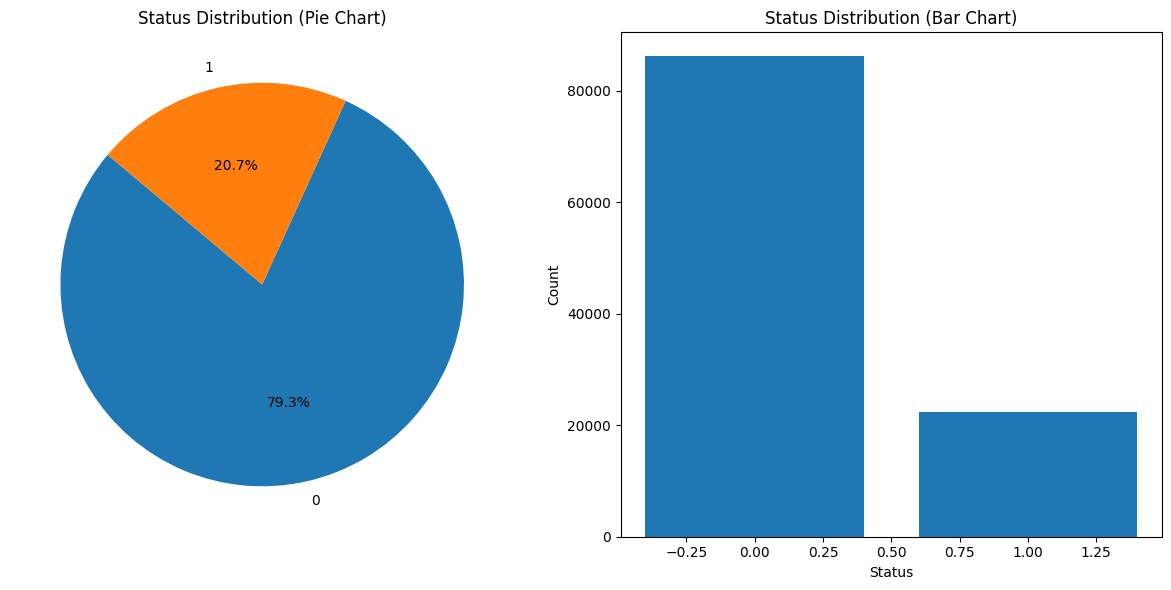

In [11]:
# Target Variable: Status

plot_distribution(bank["Status"])

<div class="alert alert-info" role="alert">
Our data is imbalanced - only 25% of our data represents those who did purchase a product based on the campaign. Addressing imbalanced data is important in machine learning because it ensures that our models can make accurate predictions for all types of outcomes, not just the most common ones. When data is imbalanced, the model might favor predicting the majority class, ignoring minority ones.
</div>

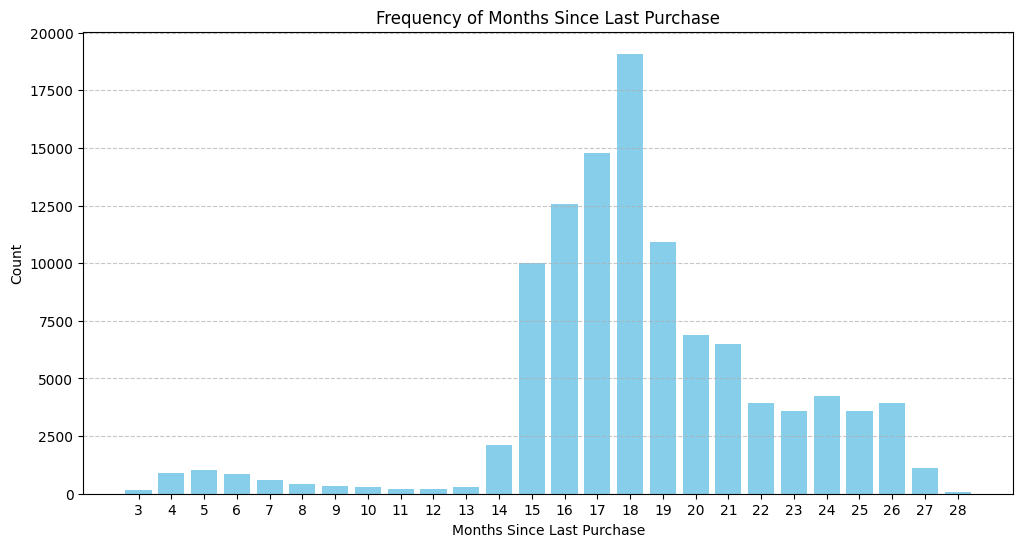

In [15]:
# Calculate the frequency of each unique value in MnthsLastPur
month_counts = bank['MnthsLastPur'].value_counts().sort_index()

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(month_counts.index, month_counts.values, color='skyblue')
plt.xlabel('Months Since Last Purchase')
plt.ylabel('Count')
plt.title('Frequency of Months Since Last Purchase')
plt.xticks(month_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<div class="alert alert-info" role="alert">
Our bar chart shows us that most customers wait 15-21 months before purchasing again
</div>

## Correlation

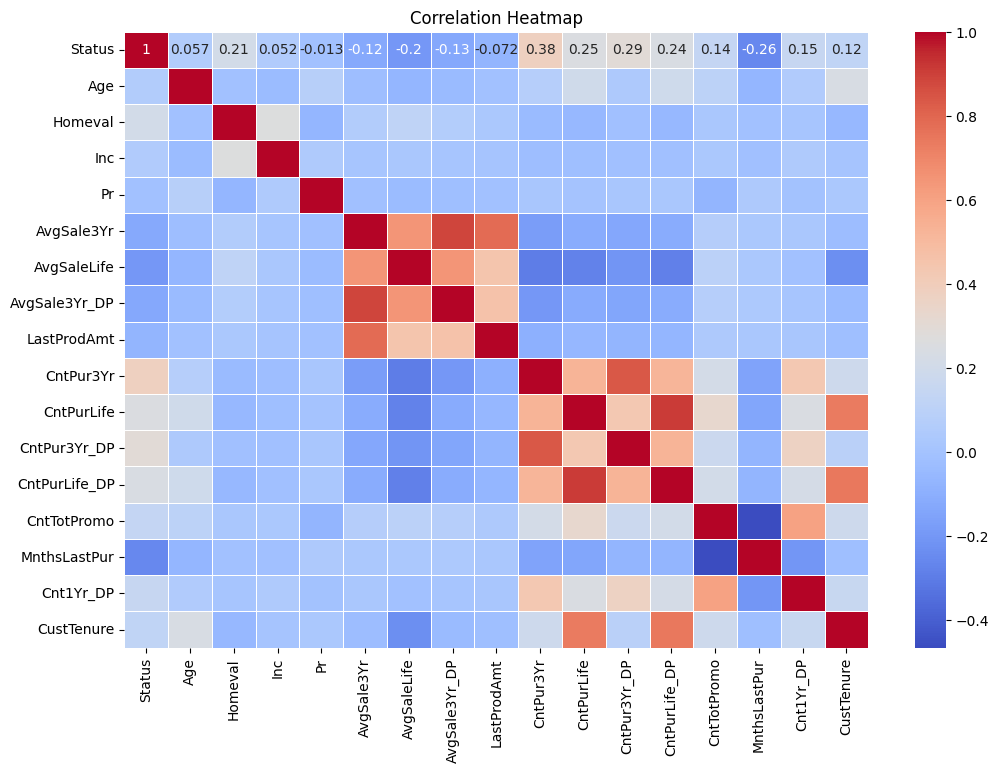

In [14]:
# Selecting our numerical values

numerical_df = bank.select_dtypes(include=['int64', 'float64'])

# Building our correlation heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<div class="alert alert-info" role="alert">
See the inverse correlated pactches? This shows that as your avergage sale value rises, the number of products purchased falls. This means that our customers tend to follow a simple rule... the bigger the purchase (amount of money), the less quantity of product you purchase.
</div>

In [20]:
# Counting occurrences of each combination
grouped_counts = bank.groupby(['Customer_Value', 'Activity_Status']).size().unstack(fill_value=0)


/tmp/ipykernel_241/2273074942.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = bank.groupby(['Customer_Value', 'Activity_Status']).size().unstack(fill_value=0)


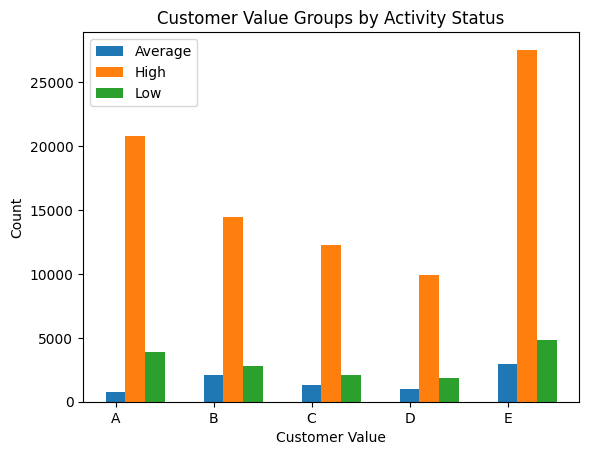

In [21]:
# Plotting
fig, ax = plt.subplots()

# Width of each bar
bar_width = 0.2

# Positions of bars on X-axis
ind = range(len(grouped_counts))

# Plotting bars for each Activity_Status
for i, status in enumerate(grouped_counts.columns):
    ax.bar([x + i * bar_width for x in ind], grouped_counts[status], width=bar_width, label=status)

ax.set_xticks(ind)
ax.set_xticklabels(grouped_counts.index)
ax.set_xlabel('Customer Value')
ax.set_ylabel('Count')
ax.set_title('Customer Value Groups by Activity Status')
ax.legend()

plt.show()


In [28]:
# Calculate average AvgSaleLife per customer for each Activity_Status
avg_avg_sale_life = bank.groupby('Activity_Status')['AvgSaleLife'].mean().reset_index()

# Calculate total number of customers for each Activity_Status
customer_counts = bank['Activity_Status'].value_counts().reset_index()
customer_counts.columns = ['Activity_Status', 'TotalCustomers']

# Merge average AvgSaleLife per customer and customer counts
result = pd.merge(avg_avg_sale_life, customer_counts, on='Activity_Status')

# Calculate proportionate AvgSaleLife per customer
result['AvgSaleLifePerCustomer'] = result['AvgSaleLife'] / result['TotalCustomers']


/tmp/ipykernel_241/1466911954.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_avg_sale_life = bank.groupby('Activity_Status')['AvgSaleLife'].mean().reset_index()


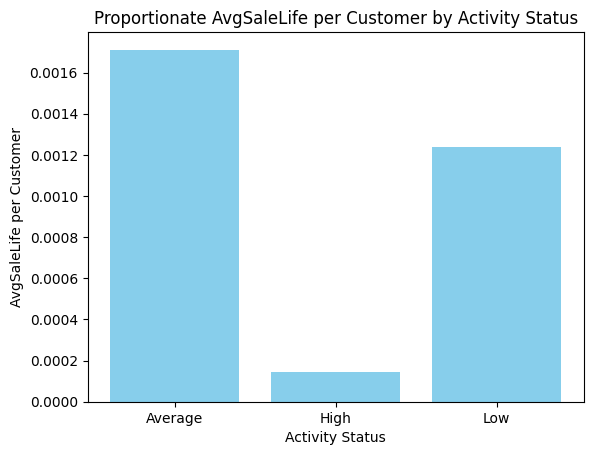

In [29]:
# Plotting
fig, ax = plt.subplots()

# Plot bars for AvgSaleLife per customer
ax.bar(result['Activity_Status'], result['AvgSaleLifePerCustomer'], color='skyblue')

# Adding labels and title
ax.set_xlabel('Activity Status')
ax.set_ylabel('AvgSaleLife per Customer')
ax.set_title('Proportionate AvgSaleLife per Customer by Activity Status')

# Display the plot
plt.show()


<div class="alert alert-info" role="alert">
With this discovery, we believe that we can cater our models based on our customer value groups as each value group works with a different demographic of cutsomer. 
</div>

# Step 4: Data Wrangling

## Imputation

## Label Encoding

## Train/Test Split